# Unit 5 - Financial Planning

In [112]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [113]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [114]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [115]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"


In [116]:
# Fetch current BTC price
data_btc = requests.get(btc_url).json()
current_btc = data_btc["data"]['1']['quotes']['USD']['price']

# Fetch current ETH price
data_eth = requests.get(eth_url).json()
current_eth = data_eth["data"]['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
my_btc_value = my_btc * current_btc
my_eth_value = my_eth * current_eth
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $57010.80
The current value of your 5.3 ETH is $18081.74


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [117]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [118]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
print(type(alpaca_api_key))
print(type(alpaca_secret_key))

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version="v2")


<class 'str'>
<class 'str'>


In [119]:
# Format current date as ISO format
today = pd.Timestamp("2021-09-09", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_portfolio = alpaca.get_barset(tickers, timeframe, start=today, end=today, limit=1000).df
 
# Preview DataFrame
df_portfolio

AGG                                      SPY  \
                             open     high      low  close   volume   open   
time                                                                         
2021-09-09 00:00:00-04:00  115.84  116.147  115.755  116.1  3232335  450.7   

                                                             
                             high     low   close    volume  
time                                                         
2021-09-09 00:00:00-04:00  452.57  448.72  448.94  51603442

In [120]:
# Pick AGG and SPY close prices
agg_close_price = df_portfolio["AGG"]["close"][-1]
spy_close_price = df_portfolio["SPY"]["close"][-1]
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.1
Current SPY closing price: $448.94


In [121]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $22447.00
The current value of your 200 AGG shares is $23220.00


### Savings Health Analysis

In [122]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
savings = {"amount":[19385.986877, 40616.500000]}

# Create savings DataFrame
df_savings = pd.DataFrame(savings, index =['crypto','shares'])

# Display savings DataFrame
display(df_savings)

amount
crypto  19385.986877
shares  40616.500000

array([<AxesSubplot:ylabel='amount'>], dtype=object)

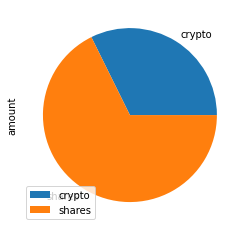

In [123]:
# Plot savings pie chart
df_savings.plot(kind="pie", subplots=True)

In [124]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = float(df_savings.sum())
difference = emergency_fund - total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! you have enough money in the fund")
elif total_savings == emergency_fund:
    print("Congratulations! you reach financial goal")
else:
    print(f"You need {difference} to reach your financial goal")
    


Congratulations! you have enough money in the fund


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [125]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [126]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(tickers, timeframe, start=start_date, end=end_date,limit=1000).df.dropna()
# Display sample data
df_stock_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                              SPY                                        
                             open    high     low    close       volume  
time                                                                     
2017-05-11 00:00:00-04:00  239.35  239.57  238.13  239.410   45435690.0  
2017-05-12 00:00:00-04:00  239.09  239.21  238.67  239.030   35283567.0  
2017-05-15 00:00:00-04:00  239.47  240.44  239.45  240.245   42230620.0  
2017-05-16 00:00:00-04:00  240.62  240.67  239.63  240.100   37206183.0  
2017-05-17 00:00:00-04:00  238.10  238.64  235.75  235.850  118613594.0

In [127]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500
weights = [0.4, 0.6]
num_yrs = 30
my_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights= weights,
    num_simulation = num_sims,
    num_trading_days = 252*num_yrs)

In [128]:
# Printing the simulation input data
my_portfolio.portfolio_data.head()

AGG                                         \
                             open     high       low    close     volume   
time                                                                       
2017-05-11 00:00:00-04:00  108.35  108.540  108.3435  108.515  1773499.0   
2017-05-12 00:00:00-04:00  108.81  108.940  108.7800  108.920  1136553.0   
2017-05-15 00:00:00-04:00  108.85  108.940  108.8200  108.890  1620264.0   
2017-05-16 00:00:00-04:00  108.88  109.101  108.8800  109.000  1394153.0   
2017-05-17 00:00:00-04:00  109.35  109.600  109.2800  109.560  2263851.0   

                                           SPY                           \
                          daily_return    open    high     low    close   
time                                                                      
2017-05-11 00:00:00-04:00          NaN  239.35  239.57  238.13  239.410   
2017-05-12 00:00:00-04:00     0.003732  239.09  239.21  238.67  239.030   
2017-05-15 00:00:00-04:00    -0.000275  239.47  240.44  239.45  240.245   
2017-05-16 00:00:00-04:00     0.001010  240.62  240.67  239.63  240.100   
2017-05-17 00:00:00-04:00     0.005138  238.10  238.64  235.75  235.850   

                                                     
                                volume daily_return  
time                                                 
2017-05-11 00:00:00-04:00   45435690.0          NaN  
2017-05-12 00:00:00-04:00   35283567.0    -0.001587  
2017-05-15 00:00:00-04:00   42230620.0     0.005083  
2017-05-16 00:00:00-04:00   37206183.0    -0.000604  
2017-05-17 00:00:00-04:00  118613594.0    -0.017701

In [129]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
my_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1          2          3          4          5    \
0      1.000000   1.000000   1.000000   1.000000   1.000000   1.000000   
1      0.979776   1.003558   1.001619   1.003556   0.993533   0.996575   
2      0.968187   0.985562   1.000527   1.001875   0.986557   0.996792   
3      0.970742   0.986594   0.998064   0.995720   0.991809   1.007480   
4      0.970880   0.993205   1.008961   0.986429   0.999808   1.005502   
...         ...        ...        ...        ...        ...        ...   
7556  30.100172  18.850234  48.166404  15.411005  18.661857  23.662946   
7557  30.296247  19.002890  48.466148  15.458820  18.421066  23.499712   
7558  30.407995  19.125205  48.687948  15.404834  18.516289  23.704561   
7559  30.695011  18.893988  48.836296  15.534376  18.713842  23.668799   
7560  30.679925  18.846524  48.952164  15.337361  18.591212  23.744683   

            6          7          8          9    ...        490        491  \
0      1.000000   1.000000   1.000000   1.000000  ...   1.000000   1.000000   
1      1.013922   1.009228   0.998824   0.993437  ...   0.998543   1.010298   
2      1.027462   1.001244   0.990879   0.995129  ...   1.001884   1.006314   
3      1.030586   1.006658   0.994461   0.997115  ...   0.998523   1.005577   
4      1.026173   0.999991   1.005928   0.989269  ...   1.006309   0.996734   
...         ...        ...        ...        ...  ...        ...        ...   
7556  14.359714   9.968042  14.939322  19.165087  ...  21.511023  32.349832   
7557  14.216439  10.040833  14.931781  19.044224  ...  21.573431  32.532872   
7558  14.322463  10.047034  15.175886  19.124125  ...  21.423393  32.481704   
7559  14.352706  10.045131  15.038217  19.164367  ...  21.547023  32.497117   
7560  14.245545  10.152111  15.057203  19.156799  ...  21.527556  32.811544   

            492        493       494        495        496        497  \
0      1.000000   1.000000  1.000000   1.000000   1.000000   1.000000   
1      0.998060   1.008718  1.009406   1.000879   1.003189   1.005404   
2      1.001247   1.001252  1.015037   1.000320   1.002323   1.012084   
3      0.998381   1.004028  1.006411   0.995496   1.014805   1.006461   
4      0.996599   0.999213  1.012918   1.019200   0.998341   1.006913   
...         ...        ...       ...        ...        ...        ...   
7556  48.923632  37.077408  7.124283  12.824887  15.089024  15.494056   
7557  49.003586  36.816466  7.163055  12.762973  15.048250  15.335385   
7558  49.230735  37.398050  7.158427  12.728658  14.967833  15.232602   
7559  49.445791  37.413045  7.252736  12.710662  15.078476  15.199692   
7560  49.352369  37.938570  7.245712  12.629132  14.939376  15.431195   

            498        499  
0      1.000000   1.000000  
1      0.998526   1.017023  
2      0.995050   1.012348  
3      0.999094   1.018381  
4      1.001353   1.016264  
...         ...        ...  
7556  14.252754  72.171672  
7557  14.405588  71.832077  
7558  14.401751  71.785174  
7559  14.440574  72.888500  
7560  14.620475  72.763921  

[7561 rows x 500 columns]

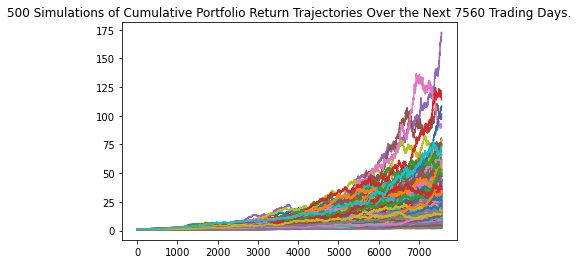

In [134]:
# Plot simulation outcomes
line_plot = my_portfolio.plot_simulation()

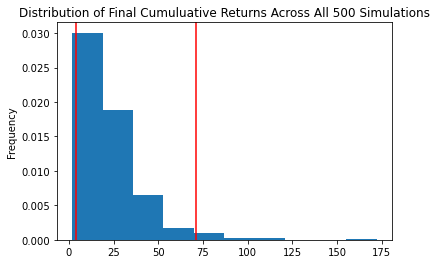

In [135]:
# Plot probability distribution and confidence intervals
dis_plot = my_portfolio.plot_distribution()

### Retirement Analysis

In [136]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = my_portfolio.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           500.000000
mean             22.807066
std              17.884663
min               1.846451
25%              10.940582
50%              18.523139
75%              29.554984
max             172.153262
95% CI Lower      4.158006
95% CI Upper     70.869332
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [137]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $83160.13 and $1417386.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [138]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(tbl[8]*initial_investment,2)
ci_upper = round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $124740.19 and $2126079.97


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [85]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [86]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [87]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [88]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [89]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [90]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

NameError: name 'ci_lower_five' is not defined

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")